# 힙 
힙: 데이터에서 최대값과 최소값을 빠르게 찾기 위해 고안된 완전 이진 트리

**두 가지 조건을 갖춰야함**

- 형태 속성 : 힙은 완전 이진 트리이다.
- 힙 속성 : 모든 노드의 데이터는 자식 노드들의 데이터보다 크거나 같다.
![화면 캡처 2023-07-25 023838.png](<attachment:화면 캡처 2023-07-25 023838.png>)

- 힙을 사용하는 이유

배열에 데이터를 넣고, 최대값과 최소값을 찾으려면 O(n) 이 걸림

이에 반해, 힙에 데이터를 넣고, 최대값과 최소값을 찾으면, O(logn)이 걸림

우선순위 큐와 같이 최대값 또는 최소값을 빠르게 찾아야 하는 자료구조 및 알고리즘 구현 등에 활용됨

- 힙 (Heap) 구조

힙은 최대값을 구하기 위한 구조 (최대 힙, Max Heap) 와, 최소값을 구하기 위한 구조 (최소 힙, Min Heap) 로 분류할 수 있음

힙은 다음과 같이 두 가지 조건을 가지고 있는 자료구조임

각 노드의 값은 해당 노드의 자식 노드가 가진 값보다 크거나 같다. (최대 힙의 경우)

최소 힙의 경우는 각 노드의 값은 해당 노드의 자식 노드가 가진 값보다 크거나 작음
완전 이진 트리 형태를 가짐

- 힙에 데이터 삽입하기 / 기본동작 

힙은 완전 이진 트리이므로, 삽입할 노드는 기본적으로 왼쪽 최하단부 노드부터 채워지는 형태로 삽입
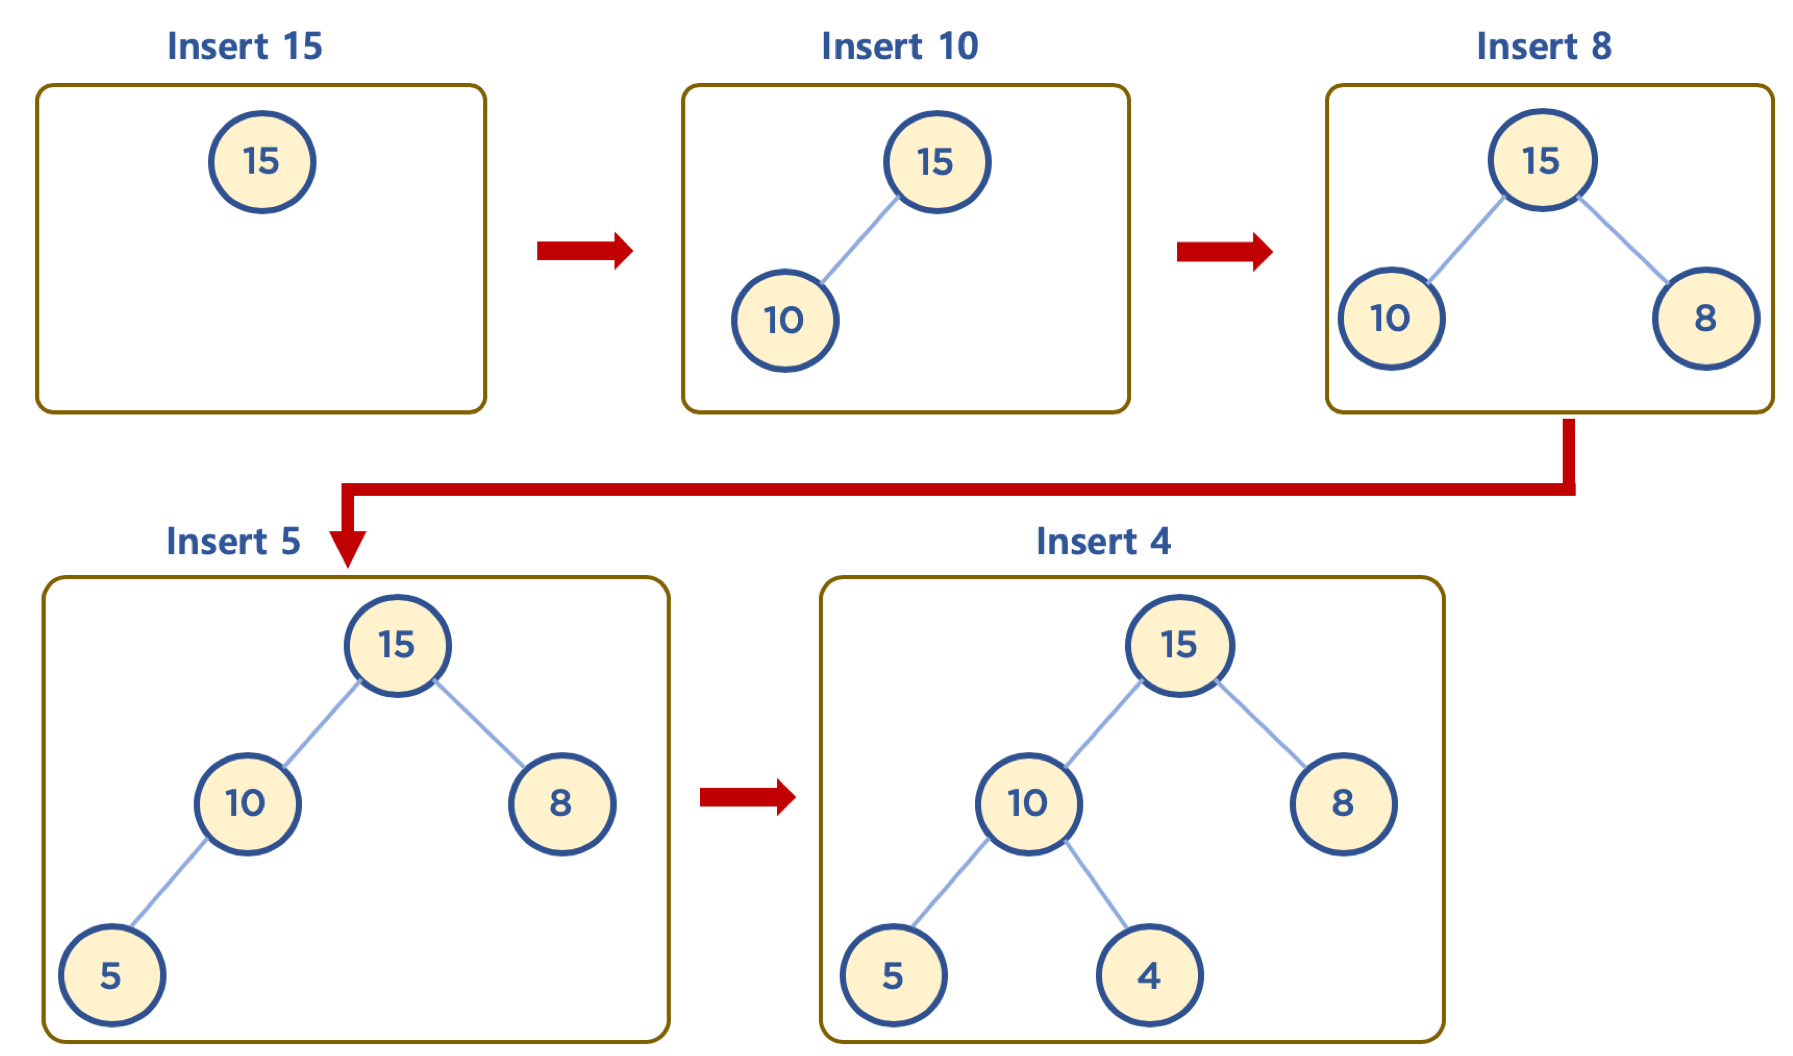
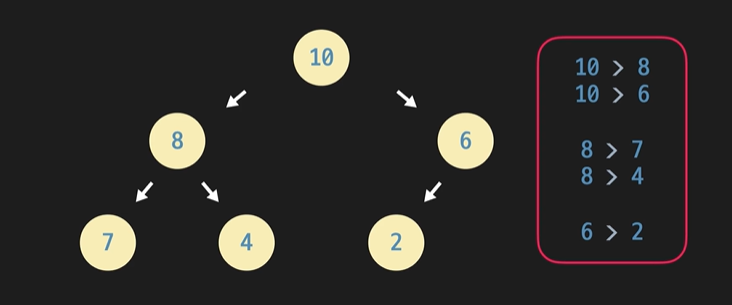

# 힙 구현하기
- 완전 이진 트리이므로 동적 배열로 구현

배열은 인덱스가 0번부터 시작하지만, 힙 구현의 편의를 위해, root 노드 인덱스 번호를 1로 지정하면, 구현이 좀더 수월함

부모 노드 인덱스 번호 (parent node’s index) = 자식 노드 인덱스 번호 (child node’s index) // 2

왼쪽 자식 노드 인덱스 번호 (left child node’s index) = 부모 노드 인덱스 번호 (parent node’s index) * 2

오른쪽 자식 노드 인덱스 번호 (right child node’s index) = 부모 노드 인덱스 번호 (parent node’s index) * 2 + 1

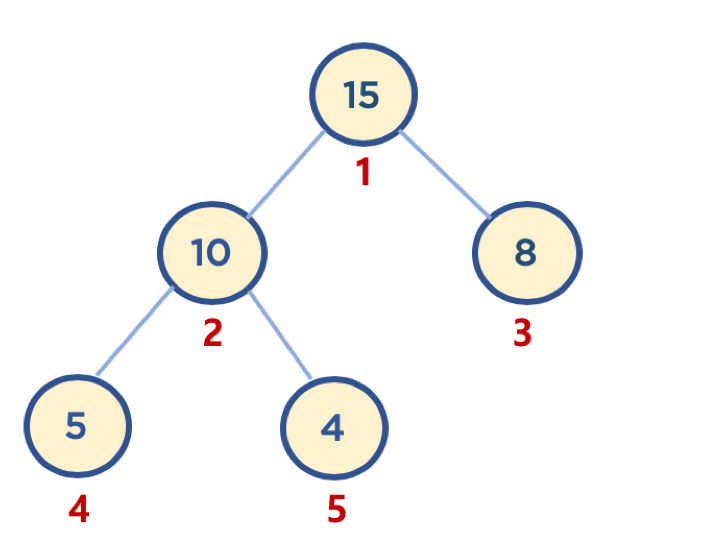

# 실습 1 - heapify 함수 구현 -
heapify() 함수는 아래 세 가지 파라미터를 받습니다.

완전 이진 트리를 나타내는 리스트, tree

heapify 하려는 노드의 인덱스, index

트리로 사용하는 리스트의 길이, tree_size (배열의 0번째 인덱스는 None으로 설정했기 때문에 실제로 총 노드 수보다 1이 큽니다.)

그리고 파라미터로 받은 tree의 index번째 노드가, 힙 속성을 유지하도록 트리 안의 노드들을 재배치합니다. (앞으로 “index" 번째 노드는 그냥 줄여서 “노드 index"라고 하겠습니다.)

heapify() 함수가 이런 기능을 하려면 아래와 같은 상세 작업을 순서대로 해야 합니다.

부모 노드(heapify하려는 현재 노드), 왼쪽 자식 노드, 오른쪽 자식 노드, 이 3가지 노드 중에서 가장 큰 값을 가진 노드가 무엇인지 파악합니다.

(1)가장 큰 값을 가진 노드가 부모 노드라면 그 상태 그대로 둡니다. (2)가장 큰 값을 가진 노드가 자식 노드 중에 있다면 그 자식 노드와 부모 노드의 위치를 바꿔 줍니다.

기존의 부모 노드가 자식 노드로 내려갔을 때, 다시 힙 속성을 어길 수도 있습니다. 힙 속성이 충족될 때까지 1~2 단계를 반복합니다.

이때 단계 2-(2)를 보면 heapify() 함수 내에는 두 노드의 위치를 바꿀 수 있는 기능이 필요하다는 걸 알 수 있습니다. 이런 기능을 하는 swap() 이라는 함수를 미리 작성해 뒀는데요. swap() 함수는 아래 두 가지 파라미터를 받습니다.

리스트로 구현한 완전 이진 트리, tree
두 인덱스, index_1과 index_2
그리고 트리 내에서 두 인덱스에 해당하는 두 노드의 위치를 바꿔주죠. heapify() 함수의 내부 코드를 작성할 때 swap() 함수를 사용해 보세요.

In [2]:
def swap(tree, index_1, index_2):
    ##완전 이진 트리의 노드 index_1과 노드 index_2의 위치를 바꿔준다##
    temp = tree[index_1]
    tree[index_1] = tree[index_2]
    tree[index_2] = temp


def heapify(tree, index, tree_size):
    ##heapify 함수##

    ## 왼쪽 자식 노드의 인덱스와 오른쪽 자식 노드의 인덱스를 계산##
    left_child_index = 2 * index
    right_child_index = 2 * index + 1

    largest = index  ## 일단 부모 노드의 값이 가장 크다고 설정##

    ## 왼쪽 자식 노드의 값과 비교##
    if 0 < left_child_index < tree_size and tree[largest] < tree[left_child_index]:
        largest = left_child_index

    ## 오른쪽 자식 노드의 값과 비교##
    if 0 < right_child_index < tree_size and tree[largest] < tree[right_child_index]:
        largest = right_child_index
    
    if largest != index: ##부모 노드의 값이 자식 노드의 값보다 작으면##
        swap(tree, index, largest)  ## 부모 노드와 최댓값을 가진 자식 노드의 위치를 바꿔준다
        heapify(tree, largest, tree_size)  ## 자리가 바뀌어 자식 노드가 된 기존의 부모 노드를대상으로 또 heapify 함수를 호출한다


# 테스트 코드
tree = [None, 15, 5, 12, 14, 9, 10, 6, 2, 11, 1]  # heapify하려고 하는 완전 이진 트리
heapify(tree, 2, len(tree))  # 노드 2에 heapify 호출
print(tree) 

[None, 15, 14, 12, 11, 9, 10, 6, 2, 5, 1]
